In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

In [2]:
all_df = pd.read_csv(r"C:\Users\assis\Downloads\PAS+crime+extra_final.csv")
all_df

,Q1,Q3C,Q3F,Q3G,Q3H,Q3I,Q3J,Q3K,Q3L,XQ3A,...,Possession of weapons,Public disorder and weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,Violent crime,face-to-face
0,2.0,4.0,4.0,5.0,NaN,2.0,NaN,2.0,1.0,NaN,...,6,0,148,83,122,448,225,399,0,1
1,5.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,...,3,0,49,14,77,13,105,264,0,1
2,8.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,NaN,...,3,0,49,14,77,13,105,264,0,1
3,6.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,1.0,NaN,...,3,0,49,14,77,13,105,264,0,1
4,4.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,NaN,...,3,0,49,14,77,13,105,264,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75907,8.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN,1.0,NaN,...,24,0,181,73,108,28,293,988,0,0
75908,6.0,2.0,2.0,NaN,NaN,2.0,1.0,NaN,2.0,NaN,...,9,0,193,37,70,38,365,738,0,0
75909,4.0,2.0,4.0,NaN,NaN,4.0,4.0,NaN,2.0,NaN,...,14,0,197,79,77,68,570,749,0,0
75910,7.0,2.0,2.0,NaN,NaN,2.0,2.0,NaN,2.0,NaN,...,12,0,170,85,40,197,257,622,0,0


In [3]:
all_df['Year']

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
75907    2021
75908    2021
75909    2021
75910    2021
75911    2021
Name: Year, Length: 75912, dtype: int64

In [4]:
new_df = all_df.copy()

In [10]:
top_20_conf = ['Criminal damage and arson', 'Q3I', 'Q3F', 'XNQ135B', 'XQ122B', 'XQ122A', 'XQ128A2B', 'NQ1', 'NQ44BC', 'Q196A', 'SQ132G', 'NQCV3', 'Q39BA', 'NQ135A_newC', 'XQ192', 'NQ2C', 'NQCV7', 'NQCV15', 'XQ57B', 'Q132N', 'Year', 'Q60']
top_20_trust = ['Vehicle crime', 'Robbery', 'Public order', 'selfemployed_number', 'Black', 'Q54C', 'NQ135BB', 'ZQ10E', 'NQCV27', 'Q39BD', 'XQ128A2A', 'ReQ139', 'SQ79DF', 'SQ79EH', 'Q10D', 'TQ132', 'NQ2G', 'Q10H', 'NQ135BN', 'XQ106B', 'Year', 'NQ135BD']

In [11]:
confidence_df = new_df[top_20_conf]
confidence_df = confidence_df.dropna(subset=['Q60'])
trust_df = new_df[top_20_trust]
trust_df = trust_df.dropna(subset=['NQ135BD'])
trust_df

,Vehicle crime,Robbery,Public order,selfemployed_number,Black,Q54C,NQ135BB,ZQ10E,NQCV27,Q39BD,...,SQ79DF,SQ79EH,Q10D,TQ132,NQ2G,Q10H,NQ135BN,XQ106B,Year,NQ135BD
0,225,83,148,20300,21000.0,2.0,4.0,NaN,NaN,NaN,...,99.0,NaN,3.0,2.0,NaN,3.0,NaN,NaN,2015,2.0
1,105,14,49,17000,10000.0,2.0,3.0,NaN,NaN,NaN,...,99.0,NaN,3.0,2.0,NaN,3.0,NaN,NaN,2015,1.0
2,105,14,49,17000,10000.0,3.0,4.0,NaN,NaN,NaN,...,99.0,NaN,3.0,1.0,NaN,3.0,NaN,NaN,2015,1.0
3,105,14,49,17000,10000.0,2.0,4.0,NaN,NaN,NaN,...,99.0,NaN,3.0,1.0,NaN,3.0,NaN,NaN,2015,3.0
4,105,14,49,17000,10000.0,1.0,10.0,NaN,NaN,NaN,...,99.0,NaN,3.0,2.0,NaN,3.0,NaN,NaN,2015,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75907,293,73,181,20700,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2021,1.0
75908,365,37,193,26300,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2021,2.0
75909,570,79,197,16100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2021,1.0
75910,257,85,170,32000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2021,2.0


In [119]:
# X = trust_df.drop(columns=['Q60'])
# y = trust_df['Q60']
# imputer = IterativeImputer()
# X_imputed = imputer.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

X = confidence_df.drop(columns=['Q60'])
y = confidence_df['Q60']
imputer = IterativeImputer()
X_imputed = imputer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [120]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parameter tuning
params = {
    'objective': 'multiclass',
    'num_class': 6,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1, 'is_unbalance': True}

gbm = lgb.train(params,
                train_data,
                num_boost_round=1000,
                valid_sets=[train_data, test_data],
                early_stopping_rounds=100)

[1]	training's multi_logloss: 1.17362	valid_1's multi_logloss: 1.17981
Training until validation scores don't improve for 100 rounds
[2]	training's multi_logloss: 1.17194	valid_1's multi_logloss: 1.17846
[3]	training's multi_logloss: 1.17035	valid_1's multi_logloss: 1.17716
[4]	training's multi_logloss: 1.1688	valid_1's multi_logloss: 1.17591
[5]	training's multi_logloss: 1.16728	valid_1's multi_logloss: 1.17465
[6]	training's multi_logloss: 1.16581	valid_1's multi_logloss: 1.17346
[7]	training's multi_logloss: 1.16436	valid_1's multi_logloss: 1.17227
[8]	training's multi_logloss: 1.16297	valid_1's multi_logloss: 1.17115
[9]	training's multi_logloss: 1.16159	valid_1's multi_logloss: 1.17004
[10]	training's multi_logloss: 1.1603	valid_1's multi_logloss: 1.16898
[11]	training's multi_logloss: 1.15903	valid_1's multi_logloss: 1.16796
[12]	training's multi_logloss: 1.1578	valid_1's multi_logloss: 1.16694
[13]	training's multi_logloss: 1.15659	valid_1's multi_logloss: 1.16598
[14]	training'

[115]	training's multi_logloss: 1.10156	valid_1's multi_logloss: 1.12758
[116]	training's multi_logloss: 1.1013	valid_1's multi_logloss: 1.12747
[117]	training's multi_logloss: 1.10106	valid_1's multi_logloss: 1.12735
[118]	training's multi_logloss: 1.10081	valid_1's multi_logloss: 1.12724
[119]	training's multi_logloss: 1.10056	valid_1's multi_logloss: 1.12713
[120]	training's multi_logloss: 1.10031	valid_1's multi_logloss: 1.12704
[121]	training's multi_logloss: 1.10007	valid_1's multi_logloss: 1.12693
[122]	training's multi_logloss: 1.09983	valid_1's multi_logloss: 1.12682
[123]	training's multi_logloss: 1.09959	valid_1's multi_logloss: 1.12669
[124]	training's multi_logloss: 1.09936	valid_1's multi_logloss: 1.12659
[125]	training's multi_logloss: 1.09913	valid_1's multi_logloss: 1.12648
[126]	training's multi_logloss: 1.09889	valid_1's multi_logloss: 1.12636
[127]	training's multi_logloss: 1.09867	valid_1's multi_logloss: 1.12626
[128]	training's multi_logloss: 1.09842	valid_1's mu

[231]	training's multi_logloss: 1.08074	valid_1's multi_logloss: 1.12125
[232]	training's multi_logloss: 1.08062	valid_1's multi_logloss: 1.12125
[233]	training's multi_logloss: 1.08046	valid_1's multi_logloss: 1.12124
[234]	training's multi_logloss: 1.08033	valid_1's multi_logloss: 1.12121
[235]	training's multi_logloss: 1.08019	valid_1's multi_logloss: 1.12119
[236]	training's multi_logloss: 1.08004	valid_1's multi_logloss: 1.12116
[237]	training's multi_logloss: 1.0799	valid_1's multi_logloss: 1.12113
[238]	training's multi_logloss: 1.07976	valid_1's multi_logloss: 1.12112
[239]	training's multi_logloss: 1.07962	valid_1's multi_logloss: 1.12111
[240]	training's multi_logloss: 1.07949	valid_1's multi_logloss: 1.12109
[241]	training's multi_logloss: 1.07935	valid_1's multi_logloss: 1.12107
[242]	training's multi_logloss: 1.07922	valid_1's multi_logloss: 1.12104
[243]	training's multi_logloss: 1.07909	valid_1's multi_logloss: 1.12103
[244]	training's multi_logloss: 1.07896	valid_1's mu

[344]	training's multi_logloss: 1.06707	valid_1's multi_logloss: 1.12025
[345]	training's multi_logloss: 1.06698	valid_1's multi_logloss: 1.12024
[346]	training's multi_logloss: 1.06687	valid_1's multi_logloss: 1.12025
[347]	training's multi_logloss: 1.06676	valid_1's multi_logloss: 1.12027
[348]	training's multi_logloss: 1.06666	valid_1's multi_logloss: 1.12027
[349]	training's multi_logloss: 1.06655	valid_1's multi_logloss: 1.12027
[350]	training's multi_logloss: 1.06645	valid_1's multi_logloss: 1.12029
[351]	training's multi_logloss: 1.06634	valid_1's multi_logloss: 1.12028
[352]	training's multi_logloss: 1.06623	valid_1's multi_logloss: 1.12028
[353]	training's multi_logloss: 1.06612	valid_1's multi_logloss: 1.12029
[354]	training's multi_logloss: 1.06602	valid_1's multi_logloss: 1.12029
[355]	training's multi_logloss: 1.06591	valid_1's multi_logloss: 1.12031
[356]	training's multi_logloss: 1.06581	valid_1's multi_logloss: 1.1203
[357]	training's multi_logloss: 1.06571	valid_1's mu

[461]	training's multi_logloss: 1.05572	valid_1's multi_logloss: 1.12038
[462]	training's multi_logloss: 1.05563	valid_1's multi_logloss: 1.12036
[463]	training's multi_logloss: 1.05554	valid_1's multi_logloss: 1.12037
[464]	training's multi_logloss: 1.05544	valid_1's multi_logloss: 1.12037
[465]	training's multi_logloss: 1.05536	valid_1's multi_logloss: 1.12037
[466]	training's multi_logloss: 1.05527	valid_1's multi_logloss: 1.12036
[467]	training's multi_logloss: 1.05518	valid_1's multi_logloss: 1.12036
[468]	training's multi_logloss: 1.05508	valid_1's multi_logloss: 1.12036
[469]	training's multi_logloss: 1.05499	valid_1's multi_logloss: 1.12036
[470]	training's multi_logloss: 1.0549	valid_1's multi_logloss: 1.12035
[471]	training's multi_logloss: 1.05481	valid_1's multi_logloss: 1.12035
[472]	training's multi_logloss: 1.05473	valid_1's multi_logloss: 1.12034
[473]	training's multi_logloss: 1.05465	valid_1's multi_logloss: 1.12034
[474]	training's multi_logloss: 1.05456	valid_1's mu

In [121]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

print('Accuracy:', accuracy_score(y_test, y_pred_max))
cm = confusion_matrix(y_test, y_pred_max)
print('Confusion Matrix:')
print(cm)
cr = classification_report(y_test, y_pred_max)
print('Classification Report:')
print(cr)

Accuracy: 0.5486495726495727
Confusion Matrix:
[[   6 1245   78    1    0]
 [   4 7433  446    7    5]
 [   2 3436  563   15   13]
 [   0  718  286   11    8]
 [   0  221  106   10   11]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.00      0.01      1330
         2.0       0.57      0.94      0.71      7895
         3.0       0.38      0.14      0.20      4029
         4.0       0.25      0.01      0.02      1023
         5.0       0.30      0.03      0.06       348

    accuracy                           0.55     14625
   macro avg       0.40      0.23      0.20     14625
weighted avg       0.48      0.55      0.44     14625



In [122]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb

ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

train_data = lgb.Dataset(X_train_res, label=y_train_res)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'multiclass',
    'num_class': 6,
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1, 'is_unbalance': True}

gbm = lgb.train(params,
                train_data,
                num_boost_round=2000,
                valid_sets=[train_data, test_data],
                early_stopping_rounds=200)

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred_max = np.argmax(y_pred, axis=1)

print('Accuracy:', accuracy_score(y_test, y_pred_max))
cm = confusion_matrix(y_test, y_pred_max)
print('Confusion Matrix:')
print(cm)

cr = classification_report(y_test, y_pred_max)
print('Classification Report:')
print(cr)

[1]	training's multi_logloss: 1.60646	valid_1's multi_logloss: 1.60747
Training until validation scores don't improve for 200 rounds
[2]	training's multi_logloss: 1.60354	valid_1's multi_logloss: 1.60551
[3]	training's multi_logloss: 1.6007	valid_1's multi_logloss: 1.60362
[4]	training's multi_logloss: 1.5979	valid_1's multi_logloss: 1.60177
[5]	training's multi_logloss: 1.59519	valid_1's multi_logloss: 1.59995
[6]	training's multi_logloss: 1.59255	valid_1's multi_logloss: 1.59825
[7]	training's multi_logloss: 1.5899	valid_1's multi_logloss: 1.59649
[8]	training's multi_logloss: 1.58735	valid_1's multi_logloss: 1.59473
[9]	training's multi_logloss: 1.58483	valid_1's multi_logloss: 1.59301
[10]	training's multi_logloss: 1.58234	valid_1's multi_logloss: 1.59132
[11]	training's multi_logloss: 1.57993	valid_1's multi_logloss: 1.5897
[12]	training's multi_logloss: 1.57755	valid_1's multi_logloss: 1.58813
[13]	training's multi_logloss: 1.57518	valid_1's multi_logloss: 1.58658
[14]	training's

[116]	training's multi_logloss: 1.45107	valid_1's multi_logloss: 1.51087
[117]	training's multi_logloss: 1.45042	valid_1's multi_logloss: 1.51056
[118]	training's multi_logloss: 1.44976	valid_1's multi_logloss: 1.51026
[119]	training's multi_logloss: 1.4491	valid_1's multi_logloss: 1.50995
[120]	training's multi_logloss: 1.44848	valid_1's multi_logloss: 1.50967
[121]	training's multi_logloss: 1.44784	valid_1's multi_logloss: 1.50933
[122]	training's multi_logloss: 1.44718	valid_1's multi_logloss: 1.509
[123]	training's multi_logloss: 1.44656	valid_1's multi_logloss: 1.50868
[124]	training's multi_logloss: 1.44597	valid_1's multi_logloss: 1.50835
[125]	training's multi_logloss: 1.44534	valid_1's multi_logloss: 1.50805
[126]	training's multi_logloss: 1.44472	valid_1's multi_logloss: 1.50775
[127]	training's multi_logloss: 1.44413	valid_1's multi_logloss: 1.50746
[128]	training's multi_logloss: 1.44353	valid_1's multi_logloss: 1.50717
[129]	training's multi_logloss: 1.44291	valid_1's mult

[230]	training's multi_logloss: 1.39647	valid_1's multi_logloss: 1.49009
[231]	training's multi_logloss: 1.39613	valid_1's multi_logloss: 1.48999
[232]	training's multi_logloss: 1.39579	valid_1's multi_logloss: 1.48989
[233]	training's multi_logloss: 1.39539	valid_1's multi_logloss: 1.48979
[234]	training's multi_logloss: 1.39506	valid_1's multi_logloss: 1.4897
[235]	training's multi_logloss: 1.39471	valid_1's multi_logloss: 1.48961
[236]	training's multi_logloss: 1.39434	valid_1's multi_logloss: 1.48951
[237]	training's multi_logloss: 1.39396	valid_1's multi_logloss: 1.4894
[238]	training's multi_logloss: 1.39359	valid_1's multi_logloss: 1.48927
[239]	training's multi_logloss: 1.39321	valid_1's multi_logloss: 1.48919
[240]	training's multi_logloss: 1.39285	valid_1's multi_logloss: 1.48908
[241]	training's multi_logloss: 1.39249	valid_1's multi_logloss: 1.48896
[242]	training's multi_logloss: 1.39212	valid_1's multi_logloss: 1.48884
[243]	training's multi_logloss: 1.39176	valid_1's mul

[344]	training's multi_logloss: 1.36017	valid_1's multi_logloss: 1.48086
[345]	training's multi_logloss: 1.35989	valid_1's multi_logloss: 1.48079
[346]	training's multi_logloss: 1.35963	valid_1's multi_logloss: 1.48077
[347]	training's multi_logloss: 1.35935	valid_1's multi_logloss: 1.48073
[348]	training's multi_logloss: 1.35909	valid_1's multi_logloss: 1.48071
[349]	training's multi_logloss: 1.35881	valid_1's multi_logloss: 1.48067
[350]	training's multi_logloss: 1.35852	valid_1's multi_logloss: 1.48063
[351]	training's multi_logloss: 1.35826	valid_1's multi_logloss: 1.48057
[352]	training's multi_logloss: 1.35798	valid_1's multi_logloss: 1.48052
[353]	training's multi_logloss: 1.3577	valid_1's multi_logloss: 1.48048
[354]	training's multi_logloss: 1.35744	valid_1's multi_logloss: 1.48042
[355]	training's multi_logloss: 1.35722	valid_1's multi_logloss: 1.48038
[356]	training's multi_logloss: 1.35691	valid_1's multi_logloss: 1.4803
[357]	training's multi_logloss: 1.35665	valid_1's mul

[457]	training's multi_logloss: 1.33113	valid_1's multi_logloss: 1.47471
[458]	training's multi_logloss: 1.33091	valid_1's multi_logloss: 1.47467
[459]	training's multi_logloss: 1.33069	valid_1's multi_logloss: 1.47461
[460]	training's multi_logloss: 1.33047	valid_1's multi_logloss: 1.47459
[461]	training's multi_logloss: 1.33021	valid_1's multi_logloss: 1.47457
[462]	training's multi_logloss: 1.32997	valid_1's multi_logloss: 1.47455
[463]	training's multi_logloss: 1.32974	valid_1's multi_logloss: 1.47453
[464]	training's multi_logloss: 1.32951	valid_1's multi_logloss: 1.47452
[465]	training's multi_logloss: 1.32932	valid_1's multi_logloss: 1.47449
[466]	training's multi_logloss: 1.32909	valid_1's multi_logloss: 1.47445
[467]	training's multi_logloss: 1.32884	valid_1's multi_logloss: 1.47438
[468]	training's multi_logloss: 1.32858	valid_1's multi_logloss: 1.47431
[469]	training's multi_logloss: 1.32832	valid_1's multi_logloss: 1.47424
[470]	training's multi_logloss: 1.32809	valid_1's m

[570]	training's multi_logloss: 1.30658	valid_1's multi_logloss: 1.47061
[571]	training's multi_logloss: 1.30636	valid_1's multi_logloss: 1.47058
[572]	training's multi_logloss: 1.30614	valid_1's multi_logloss: 1.47055
[573]	training's multi_logloss: 1.30592	valid_1's multi_logloss: 1.47054
[574]	training's multi_logloss: 1.30573	valid_1's multi_logloss: 1.47052
[575]	training's multi_logloss: 1.30553	valid_1's multi_logloss: 1.4705
[576]	training's multi_logloss: 1.30532	valid_1's multi_logloss: 1.47048
[577]	training's multi_logloss: 1.30512	valid_1's multi_logloss: 1.47045
[578]	training's multi_logloss: 1.30492	valid_1's multi_logloss: 1.47042
[579]	training's multi_logloss: 1.30472	valid_1's multi_logloss: 1.47038
[580]	training's multi_logloss: 1.30452	valid_1's multi_logloss: 1.47033
[581]	training's multi_logloss: 1.30429	valid_1's multi_logloss: 1.47029
[582]	training's multi_logloss: 1.30407	valid_1's multi_logloss: 1.47025
[583]	training's multi_logloss: 1.30385	valid_1's mu

[683]	training's multi_logloss: 1.28454	valid_1's multi_logloss: 1.46656
[684]	training's multi_logloss: 1.28438	valid_1's multi_logloss: 1.46652
[685]	training's multi_logloss: 1.28422	valid_1's multi_logloss: 1.4665
[686]	training's multi_logloss: 1.28404	valid_1's multi_logloss: 1.46644
[687]	training's multi_logloss: 1.28385	valid_1's multi_logloss: 1.4664
[688]	training's multi_logloss: 1.28367	valid_1's multi_logloss: 1.46634
[689]	training's multi_logloss: 1.28349	valid_1's multi_logloss: 1.46628
[690]	training's multi_logloss: 1.28331	valid_1's multi_logloss: 1.46623
[691]	training's multi_logloss: 1.28315	valid_1's multi_logloss: 1.46619
[692]	training's multi_logloss: 1.28299	valid_1's multi_logloss: 1.46615
[693]	training's multi_logloss: 1.28285	valid_1's multi_logloss: 1.46611
[694]	training's multi_logloss: 1.28269	valid_1's multi_logloss: 1.46607
[695]	training's multi_logloss: 1.28253	valid_1's multi_logloss: 1.46603
[696]	training's multi_logloss: 1.28232	valid_1's mul

[797]	training's multi_logloss: 1.26359	valid_1's multi_logloss: 1.4628
[798]	training's multi_logloss: 1.26342	valid_1's multi_logloss: 1.46278
[799]	training's multi_logloss: 1.26325	valid_1's multi_logloss: 1.46276
[800]	training's multi_logloss: 1.26309	valid_1's multi_logloss: 1.46275
[801]	training's multi_logloss: 1.26289	valid_1's multi_logloss: 1.46271
[802]	training's multi_logloss: 1.26271	valid_1's multi_logloss: 1.46266
[803]	training's multi_logloss: 1.26251	valid_1's multi_logloss: 1.46262
[804]	training's multi_logloss: 1.26233	valid_1's multi_logloss: 1.46257
[805]	training's multi_logloss: 1.26213	valid_1's multi_logloss: 1.46252
[806]	training's multi_logloss: 1.26195	valid_1's multi_logloss: 1.46249
[807]	training's multi_logloss: 1.26179	valid_1's multi_logloss: 1.46245
[808]	training's multi_logloss: 1.26161	valid_1's multi_logloss: 1.46242
[809]	training's multi_logloss: 1.26143	valid_1's multi_logloss: 1.4624
[810]	training's multi_logloss: 1.26126	valid_1's mul

[911]	training's multi_logloss: 1.24472	valid_1's multi_logloss: 1.45981
[912]	training's multi_logloss: 1.24457	valid_1's multi_logloss: 1.45981
[913]	training's multi_logloss: 1.24441	valid_1's multi_logloss: 1.4598
[914]	training's multi_logloss: 1.24424	valid_1's multi_logloss: 1.4598
[915]	training's multi_logloss: 1.24405	valid_1's multi_logloss: 1.45979
[916]	training's multi_logloss: 1.24386	valid_1's multi_logloss: 1.45976
[917]	training's multi_logloss: 1.24366	valid_1's multi_logloss: 1.45972
[918]	training's multi_logloss: 1.24346	valid_1's multi_logloss: 1.45969
[919]	training's multi_logloss: 1.24325	valid_1's multi_logloss: 1.45963
[920]	training's multi_logloss: 1.24304	valid_1's multi_logloss: 1.45962
[921]	training's multi_logloss: 1.24283	valid_1's multi_logloss: 1.45957
[922]	training's multi_logloss: 1.24262	valid_1's multi_logloss: 1.45953
[923]	training's multi_logloss: 1.24243	valid_1's multi_logloss: 1.45948
[924]	training's multi_logloss: 1.24222	valid_1's mul

[1026]	training's multi_logloss: 1.22594	valid_1's multi_logloss: 1.45674
[1027]	training's multi_logloss: 1.22577	valid_1's multi_logloss: 1.4567
[1028]	training's multi_logloss: 1.2256	valid_1's multi_logloss: 1.45665
[1029]	training's multi_logloss: 1.22544	valid_1's multi_logloss: 1.45662
[1030]	training's multi_logloss: 1.22527	valid_1's multi_logloss: 1.45659
[1031]	training's multi_logloss: 1.22511	valid_1's multi_logloss: 1.45661
[1032]	training's multi_logloss: 1.22496	valid_1's multi_logloss: 1.45661
[1033]	training's multi_logloss: 1.2248	valid_1's multi_logloss: 1.45662
[1034]	training's multi_logloss: 1.22468	valid_1's multi_logloss: 1.45664
[1035]	training's multi_logloss: 1.22454	valid_1's multi_logloss: 1.45666
[1036]	training's multi_logloss: 1.22435	valid_1's multi_logloss: 1.45662
[1037]	training's multi_logloss: 1.22416	valid_1's multi_logloss: 1.45659
[1038]	training's multi_logloss: 1.224	valid_1's multi_logloss: 1.45655
[1039]	training's multi_logloss: 1.22381	va

[1139]	training's multi_logloss: 1.20859	valid_1's multi_logloss: 1.45391
[1140]	training's multi_logloss: 1.20847	valid_1's multi_logloss: 1.4539
[1141]	training's multi_logloss: 1.20828	valid_1's multi_logloss: 1.45389
[1142]	training's multi_logloss: 1.20811	valid_1's multi_logloss: 1.45389
[1143]	training's multi_logloss: 1.20795	valid_1's multi_logloss: 1.45388
[1144]	training's multi_logloss: 1.20778	valid_1's multi_logloss: 1.45387
[1145]	training's multi_logloss: 1.20762	valid_1's multi_logloss: 1.45387
[1146]	training's multi_logloss: 1.20749	valid_1's multi_logloss: 1.45388
[1147]	training's multi_logloss: 1.20735	valid_1's multi_logloss: 1.45388
[1148]	training's multi_logloss: 1.20722	valid_1's multi_logloss: 1.45388
[1149]	training's multi_logloss: 1.20709	valid_1's multi_logloss: 1.45389
[1150]	training's multi_logloss: 1.20696	valid_1's multi_logloss: 1.45389
[1151]	training's multi_logloss: 1.20679	valid_1's multi_logloss: 1.45391
[1152]	training's multi_logloss: 1.2066

[1253]	training's multi_logloss: 1.19199	valid_1's multi_logloss: 1.45211
[1254]	training's multi_logloss: 1.19185	valid_1's multi_logloss: 1.45209
[1255]	training's multi_logloss: 1.19173	valid_1's multi_logloss: 1.45207
[1256]	training's multi_logloss: 1.19158	valid_1's multi_logloss: 1.45203
[1257]	training's multi_logloss: 1.19145	valid_1's multi_logloss: 1.45202
[1258]	training's multi_logloss: 1.19131	valid_1's multi_logloss: 1.45197
[1259]	training's multi_logloss: 1.19119	valid_1's multi_logloss: 1.45194
[1260]	training's multi_logloss: 1.19106	valid_1's multi_logloss: 1.45191
[1261]	training's multi_logloss: 1.19093	valid_1's multi_logloss: 1.45187
[1262]	training's multi_logloss: 1.19079	valid_1's multi_logloss: 1.45184
[1263]	training's multi_logloss: 1.19066	valid_1's multi_logloss: 1.45179
[1264]	training's multi_logloss: 1.19053	valid_1's multi_logloss: 1.45175
[1265]	training's multi_logloss: 1.1904	valid_1's multi_logloss: 1.45172
[1266]	training's multi_logloss: 1.1902

[1368]	training's multi_logloss: 1.17634	valid_1's multi_logloss: 1.44936
[1369]	training's multi_logloss: 1.17621	valid_1's multi_logloss: 1.44933
[1370]	training's multi_logloss: 1.17608	valid_1's multi_logloss: 1.44931
[1371]	training's multi_logloss: 1.17592	valid_1's multi_logloss: 1.44928
[1372]	training's multi_logloss: 1.17576	valid_1's multi_logloss: 1.44925
[1373]	training's multi_logloss: 1.1756	valid_1's multi_logloss: 1.44921
[1374]	training's multi_logloss: 1.17546	valid_1's multi_logloss: 1.44918
[1375]	training's multi_logloss: 1.17531	valid_1's multi_logloss: 1.44914
[1376]	training's multi_logloss: 1.17516	valid_1's multi_logloss: 1.44914
[1377]	training's multi_logloss: 1.17502	valid_1's multi_logloss: 1.44913
[1378]	training's multi_logloss: 1.17488	valid_1's multi_logloss: 1.44913
[1379]	training's multi_logloss: 1.17475	valid_1's multi_logloss: 1.44912
[1380]	training's multi_logloss: 1.17461	valid_1's multi_logloss: 1.44911
[1381]	training's multi_logloss: 1.1744

[1481]	training's multi_logloss: 1.16121	valid_1's multi_logloss: 1.44753
[1482]	training's multi_logloss: 1.16106	valid_1's multi_logloss: 1.44751
[1483]	training's multi_logloss: 1.16092	valid_1's multi_logloss: 1.44748
[1484]	training's multi_logloss: 1.16078	valid_1's multi_logloss: 1.44745
[1485]	training's multi_logloss: 1.16062	valid_1's multi_logloss: 1.44741
[1486]	training's multi_logloss: 1.16047	valid_1's multi_logloss: 1.44739
[1487]	training's multi_logloss: 1.16032	valid_1's multi_logloss: 1.44738
[1488]	training's multi_logloss: 1.16016	valid_1's multi_logloss: 1.44736
[1489]	training's multi_logloss: 1.16	valid_1's multi_logloss: 1.44734
[1490]	training's multi_logloss: 1.15986	valid_1's multi_logloss: 1.44731
[1491]	training's multi_logloss: 1.15974	valid_1's multi_logloss: 1.44731
[1492]	training's multi_logloss: 1.15958	valid_1's multi_logloss: 1.4473
[1493]	training's multi_logloss: 1.15947	valid_1's multi_logloss: 1.4473
[1494]	training's multi_logloss: 1.15934	va

[1593]	training's multi_logloss: 1.14695	valid_1's multi_logloss: 1.44578
[1594]	training's multi_logloss: 1.14685	valid_1's multi_logloss: 1.44576
[1595]	training's multi_logloss: 1.14673	valid_1's multi_logloss: 1.44572
[1596]	training's multi_logloss: 1.1466	valid_1's multi_logloss: 1.44569
[1597]	training's multi_logloss: 1.14647	valid_1's multi_logloss: 1.44568
[1598]	training's multi_logloss: 1.14635	valid_1's multi_logloss: 1.44567
[1599]	training's multi_logloss: 1.14622	valid_1's multi_logloss: 1.44563
[1600]	training's multi_logloss: 1.14609	valid_1's multi_logloss: 1.44561
[1601]	training's multi_logloss: 1.14596	valid_1's multi_logloss: 1.4456
[1602]	training's multi_logloss: 1.14582	valid_1's multi_logloss: 1.4456
[1603]	training's multi_logloss: 1.14568	valid_1's multi_logloss: 1.4456
[1604]	training's multi_logloss: 1.14553	valid_1's multi_logloss: 1.4456
[1605]	training's multi_logloss: 1.14539	valid_1's multi_logloss: 1.44561
[1606]	training's multi_logloss: 1.14525	va

[1707]	training's multi_logloss: 1.13315	valid_1's multi_logloss: 1.44415
[1708]	training's multi_logloss: 1.13302	valid_1's multi_logloss: 1.44415
[1709]	training's multi_logloss: 1.13292	valid_1's multi_logloss: 1.44415
[1710]	training's multi_logloss: 1.13279	valid_1's multi_logloss: 1.44415
[1711]	training's multi_logloss: 1.13267	valid_1's multi_logloss: 1.44414
[1712]	training's multi_logloss: 1.13255	valid_1's multi_logloss: 1.44415
[1713]	training's multi_logloss: 1.13243	valid_1's multi_logloss: 1.44415
[1714]	training's multi_logloss: 1.13234	valid_1's multi_logloss: 1.44415
[1715]	training's multi_logloss: 1.13222	valid_1's multi_logloss: 1.44415
[1716]	training's multi_logloss: 1.1321	valid_1's multi_logloss: 1.44413
[1717]	training's multi_logloss: 1.13198	valid_1's multi_logloss: 1.44412
[1718]	training's multi_logloss: 1.13186	valid_1's multi_logloss: 1.44408
[1719]	training's multi_logloss: 1.13175	valid_1's multi_logloss: 1.44406
[1720]	training's multi_logloss: 1.1316

[1820]	training's multi_logloss: 1.12019	valid_1's multi_logloss: 1.44261
[1821]	training's multi_logloss: 1.12008	valid_1's multi_logloss: 1.44259
[1822]	training's multi_logloss: 1.11997	valid_1's multi_logloss: 1.44258
[1823]	training's multi_logloss: 1.11985	valid_1's multi_logloss: 1.44256
[1824]	training's multi_logloss: 1.11974	valid_1's multi_logloss: 1.44254
[1825]	training's multi_logloss: 1.11963	valid_1's multi_logloss: 1.44253
[1826]	training's multi_logloss: 1.11949	valid_1's multi_logloss: 1.44252
[1827]	training's multi_logloss: 1.11936	valid_1's multi_logloss: 1.44252
[1828]	training's multi_logloss: 1.11923	valid_1's multi_logloss: 1.44251
[1829]	training's multi_logloss: 1.11909	valid_1's multi_logloss: 1.44249
[1830]	training's multi_logloss: 1.11896	valid_1's multi_logloss: 1.44249
[1831]	training's multi_logloss: 1.11884	valid_1's multi_logloss: 1.44246
[1832]	training's multi_logloss: 1.11871	valid_1's multi_logloss: 1.44246
[1833]	training's multi_logloss: 1.118

[1933]	training's multi_logloss: 1.10742	valid_1's multi_logloss: 1.44095
[1934]	training's multi_logloss: 1.1073	valid_1's multi_logloss: 1.44092
[1935]	training's multi_logloss: 1.10719	valid_1's multi_logloss: 1.4409
[1936]	training's multi_logloss: 1.10708	valid_1's multi_logloss: 1.44091
[1937]	training's multi_logloss: 1.10696	valid_1's multi_logloss: 1.44092
[1938]	training's multi_logloss: 1.10685	valid_1's multi_logloss: 1.44093
[1939]	training's multi_logloss: 1.10675	valid_1's multi_logloss: 1.44096
[1940]	training's multi_logloss: 1.10663	valid_1's multi_logloss: 1.44097
[1941]	training's multi_logloss: 1.1065	valid_1's multi_logloss: 1.44094
[1942]	training's multi_logloss: 1.10639	valid_1's multi_logloss: 1.44092
[1943]	training's multi_logloss: 1.10627	valid_1's multi_logloss: 1.4409
[1944]	training's multi_logloss: 1.10616	valid_1's multi_logloss: 1.44088
[1945]	training's multi_logloss: 1.10605	valid_1's multi_logloss: 1.44085
[1946]	training's multi_logloss: 1.10594	v

Importance of 'Q3I': 16780


ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (20).

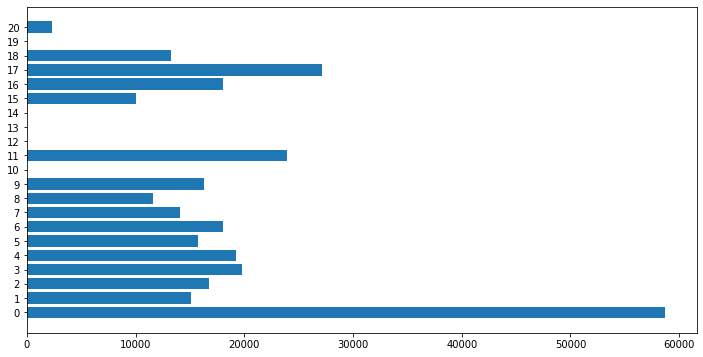

In [128]:
import matplotlib.pyplot as plt

importance = gbm.feature_importance()
feature_names = ['Criminal damage and arson', 'Q3I', 'Q3F', 'XNQ135B', 'XQ122B', 'XQ122A', 'XQ128A2B', 'NQ1', 'NQ44BC', 'Q196A', 'SQ132G', 'NQCV3', 'Q39BA', 'NQ135A_newC', 'XQ192', 'NQ2C', 'NQCV7', 'NQCV15', 'XQ57B', 'Q132N']

feature_importance = dict(zip(feature_names, importance))

print(f"Importance of 'Q3I': {feature_importance.get('Q3F', 'Not found')}")

plt.figure(figsize=(12, 6))
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(importance)), feature_names)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [130]:
correlation = confidence_df[['Q3I', 'Q60']].corr()
print(correlation)
correlation = confidence_df[['Q3F', 'Q60']].corr()
print(correlation)

          Q3I       Q60
Q3I  1.000000  0.239813
Q60  0.239813  1.000000
          Q3F       Q60
Q3F  1.000000  0.239437
Q60  0.239437  1.000000


In [131]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(confidence_df['Q3I'], confidence_df['Q60'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")
contingency_table = pd.crosstab(confidence_df['Q3F'], confidence_df['Q60'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 5225.503660860032
P-value: 0.0
Chi-square value: 5130.091927716441
P-value: 0.0


In [132]:
conditional_prob = contingency_table.apply(lambda x: x / x.sum(), axis=1)
print(conditional_prob)

conditional_prob.plot(kind='bar', stacked=True)
plt.title('Conditional Probability of Q60 given Q54C')
plt.xlabel('Q54C')
plt.ylabel('Probability')
plt.legend(title='Q60')
plt.show()

Q60       1.0       2.0       3.0       4.0       5.0
Q3F                                                  
1.0  0.161215  0.616472  0.180374  0.030724  0.011215
2.0  0.081149  0.584976  0.266321  0.054426  0.013128
3.0  0.066326  0.436294  0.362556  0.104409  0.030415
4.0  0.058645  0.349275  0.337806  0.182212  0.072062
5.0  0.062429  0.286039  0.296254  0.199773  0.155505
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\assis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\assis\AppData\Local\Temp\ipykernel_60228\3265311001.py", line 5, in <cell line: 5>
    conditional_prob.plot(kind='bar', stacked=True)
  File "C:\Users\assis\anaconda3\lib\site-packages\pandas\plotting\_core.py", line 892, in __call__
    ("figsize", None),
  File "C:\Users\assis\anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1849, in _get_plot_backend
  File "C:\Users\assis\anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1787, in _load_backend
    chosen in a way that the hexagons are approximately regular.
ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\assis\anaconda3\lib\site

In [140]:
import statsmodels.api as sm
confidence_df['Q3I'].fillna(confidence_df['Q3I'].mean(), inplace=True)
confidence_df['Q3F'].fillna(confidence_df['Q3F'].mean(), inplace=True)
df_clean = confidence_df.dropna(subset=['Q60'])

X = df_clean[['Q3I', 'Q3F']] 
X = pd.get_dummies(X, drop_first=True)

y = pd.get_dummies(df_clean['Q60'], prefix='y', drop_first=True) # Convert categorical outcome to dummy variables

# Binary Logistic models for each y value 
import statsmodels.api as sm

results_dict = {}
for level in y.columns:
    y_level = y[level]
    model = sm.Logit(y_level, sm.add_constant(X))  # Assuming X contains Q3I and Q3F
    results = model.fit()
    results_dict[level] = results.summary()
results_dict 

Optimization terminated successfully.
         Current function value: 13.660047
         Iterations 4


C:\Users\assis\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\assis\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: 183.485087
         Iterations 5


C:\Users\assis\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\assis\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\assis\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\assis\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Optimization terminated successfully.
         Current function value: inf
         Iterations 8


C:\Users\assis\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\assis\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


{'y_2.0': <class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:                  y_2.0   No. Observations:                73124
 Model:                          Logit   Df Residuals:                    73121
 Method:                           MLE   Df Model:                            2
 Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                     inf
 Time:                        19:51:54   Log-Likelihood:            -9.9888e+05
 converged:                       True   LL-Null:                        0.0000
 Covariance Type:            nonrobust   LLR p-value:                     1.000
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          1.3588      0.027     49.526      0.000       1.305       1.413
 Q3I           -0.2517      0.011    -23.938      0.000      

In [152]:
df_clean['binary_outcome'] = (df_clean['Q60'] == 1).astype(int)


X = df_clean[['Q3I', 'Q3F']]
X = sm.add_constant(X)
y = df_clean['binary_outcome']

# Extra logistic regression for y value = 1
model = sm.Logit(y, X)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.304672
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         binary_outcome   No. Observations:                73124
Model:                          Logit   Df Residuals:                    73121
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Jun 2024   Pseudo R-squ.:                 0.01372
Time:                        20:07:02   Log-Likelihood:                -22279.
converged:                       True   LL-Null:                       -22589.
Covariance Type:            nonrobust   LLR p-value:                2.671e-135
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1662      0.047    -24.751      0.000      -1.259      -1.074
Q3I           -0.2809      0.

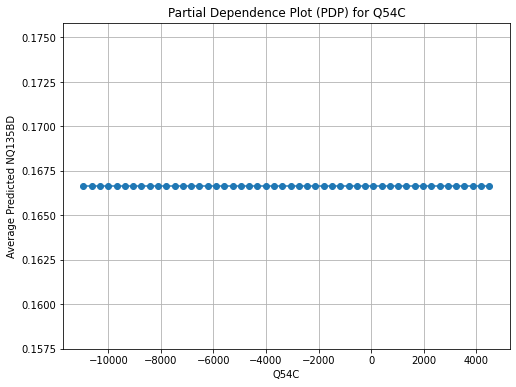

In [49]:
import matplotlib.pyplot as plt

feature_index_Q54C = feature_names.index('Q54C')

q54c_values = np.linspace(X_test[:, feature_index_Q54C].min(), X_test[:, feature_index_Q54C].max(), num=50)

#PDP
def calculate_pdp(model, X, feature_index, feature_values):
    pdp_values = []
    for value in feature_values:
        X_temp = X.copy()
        X_temp[:, feature_index] = value
        predictions = model.predict(X_temp)
        pdp_values.append(np.mean(predictions))
    return pdp_values

pdp_values = calculate_pdp(gbm, X_test, feature_index_Q54C, q54c_values)

plt.figure(figsize=(8, 6))
plt.plot(q54c_values, pdp_values, marker='o', linestyle='-')
plt.xlabel('Q54C')
plt.ylabel('Average Predicted NQ135BD')
plt.title('Partial Dependence Plot (PDP) for Q54C')
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (4,) and (15133, 6)

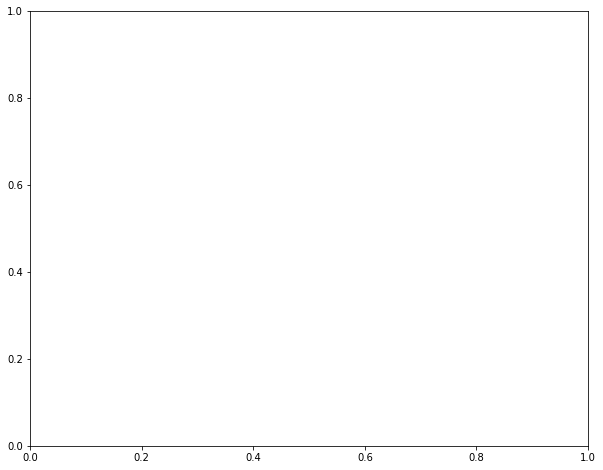

In [52]:
# Assuming q54c_values contains the 6 distinct values of Q54C
q54c_values = [1.0, 2.0, 3.0, 4.0]

# Function to calculate ICE for a specific feature
def calculate_ice(model, X, feature_index, values):
    ice_values = []
    for value in values:
        X_ice = X.copy()
        X_ice[:, feature_index] = value
        ice_values.append(model.predict(X_ice))
    return ice_values

# Example of calculating ICE for Q54C
feature_index_Q54C = feature_names.index('Q54C')  # Adjust this based on your feature names
ice_values = calculate_ice(gbm, X_test, feature_index_Q54C, q54c_values)

In [181]:
ice_array = np.mean(ice_values[2], axis=0)[0:4]

array([1.08597228e-15, 1.53777205e-01, 2.15640196e-01, 2.35337586e-01])

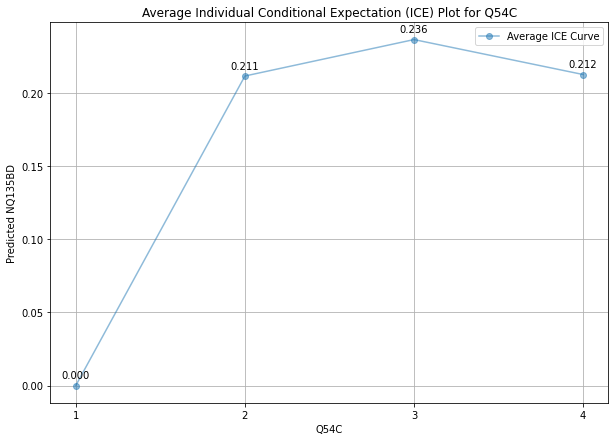

In [112]:
avg_ice_values = ice_array

q54c_values = [1.0, 2.0, 3.0, 4.0]

# ICE curve
plt.figure(figsize=(10, 7))
plt.xticks(q54c_values)
plt.plot(q54c_values, avg_ice_values, marker='o', linestyle='-', alpha=0.5, label='Average ICE Curve')

for i, value in enumerate(avg_ice_values):
    plt.annotate(f'{value:.3f}', (q54c_values[i], value), textcoords="offset points", xytext=(0,7), ha='center')

plt.xlabel('Q54C')
plt.ylabel('Predicted NQ135BD')
plt.title('Average Individual Conditional Expectation (ICE) Plot for Q54C')
plt.legend()
plt.grid(True)
plt.show()

In [182]:
conditional_prob = contingency_table.apply(lambda x: x / x.sum(), axis=1)
print(conditional_prob)

# Plot conditional probabilities
conditional_prob.plot(kind='bar', stacked=True)
plt.title('Conditional Probability of Q60 given Q54C')
plt.xlabel('Q54C')
plt.ylabel('Probability')
plt.legend(title='Q60')
plt.show()

Q60       1.0       2.0       3.0       4.0       5.0
Q3F                                                  
1.0  0.161215  0.616472  0.180374  0.030724  0.011215
2.0  0.081149  0.584976  0.266321  0.054426  0.013128
3.0  0.066326  0.436294  0.362556  0.104409  0.030415
4.0  0.058645  0.349275  0.337806  0.182212  0.072062
5.0  0.062429  0.286039  0.296254  0.199773  0.155505
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\assis\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\assis\AppData\Local\Temp\ipykernel_60228\3265311001.py", line 5, in <cell line: 5>
    conditional_prob.plot(kind='bar', stacked=True)
  File "C:\Users\assis\anaconda3\lib\site-packages\pandas\plotting\_core.py", line 892, in __call__
    ("figsize", None),
  File "C:\Users\assis\anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1849, in _get_plot_backend
  File "C:\Users\assis\anaconda3\lib\site-packages\pandas\plotting\_core.py", line 1787, in _load_backend
    chosen in a way that the hexagons are approximately regular.
ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\assis\anaconda3\lib\site

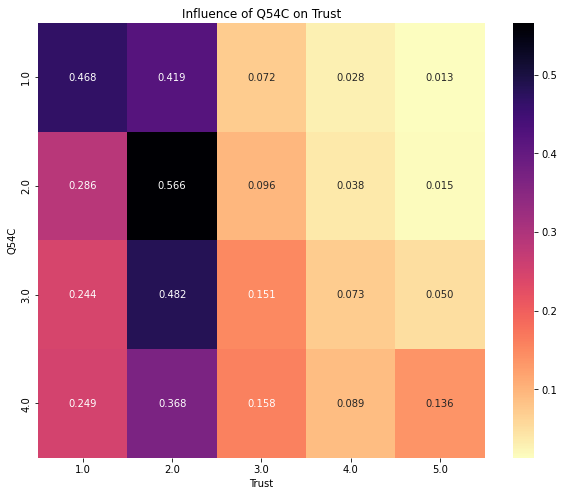

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your example
data = np.array([
    [0.467770, 0.418931, 0.072232, 0.028138, 0.012929],
    [0.285807, 0.565728, 0.095594, 0.037595, 0.015276],
    [0.244191, 0.482267, 0.150836, 0.072564, 0.050143],
    [0.248804, 0.368421, 0.157895, 0.088517, 0.136364]
])

# Q54C values and NQ135BD categories
q54c_values = [1.0, 2.0, 3.0, 4.0]
nq135bd_categories = [1.0, 2.0, 3.0, 4.0, 5.0]

# Create a heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, cmap='magma_r', fmt='.3f', xticklabels=nq135bd_categories, yticklabels=q54c_values)

plt.xlabel('Trust')
plt.ylabel('Q54C')
plt.title('Influence of Q54C on Trust')

plt.show()

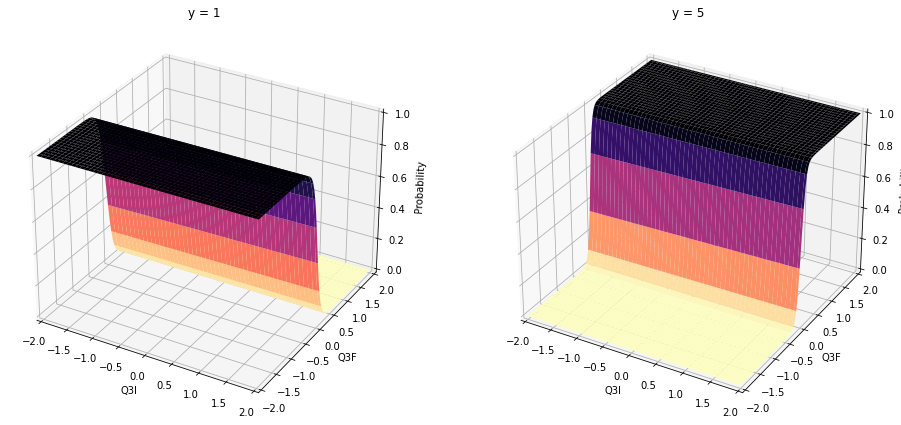

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Provided results
results = {
    'y = 1': """
               coef    std err          z      P>|z|      [0.025      0.975]
               ---------------------------------------------------------------
               const         -1.1662      0.047    -24.751      0.000      -1.259      -1.074
               Q3I           -0.2809      0.020    -14.056      0.000      -0.320      -0.242
               Q3F           -0.2509      0.021    -11.792      0.000      -0.293      -0.209
               """,
    'y = 5': """
               coef    std err          z      P>|z|      [0.025      0.975]
               ---------------------------------------------------------------
               const         -6.3569      0.082    -77.420      0.000      -6.518      -6.196
               Q3I            0.5109      0.028     18.254      0.000       0.456       0.566
               Q3F            0.5350      0.029     18.543      0.000       0.478       0.592
               """
}

# Extract coefficients for y = 1 and y = 5
coef_values = {}
for key in ['y = 1', 'y = 5']:
    lines = results[key].strip().splitlines()
    coef_line = lines[-1].strip().split()
    coef_values[key] = {
        'const': float(coef_line[1]),
        'Q3I': float(coef_line[2]),
        'Q3F': float(coef_line[3])
    }

# Generate grid of Q3I and Q3F values
Q3I_values = np.linspace(-2, 2, 100)
Q3F_values = np.linspace(-2, 2, 100)
Q3I_mesh, Q3F_mesh = np.meshgrid(Q3I_values, Q3F_values)

# Create figure and axes
fig = plt.figure(figsize=(14, 6))

# Plot for y = 1
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
log_odds_y1 = (coef_values['y = 1']['const'] +
               coef_values['y = 1']['Q3I'] * Q3I_mesh +
               coef_values['y = 1']['Q3F'] * Q3F_mesh)
probabilities_y1 = 1 / (1 + np.exp(-log_odds_y1))
ax1.plot_surface(Q3I_mesh, Q3F_mesh, probabilities_y1, cmap='magma_r', edgecolor='none')
ax1.set_title('y = 1')
ax1.set_xlabel('Q3I')
ax1.set_ylabel('Q3F')
ax1.set_zlabel('Probability')
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_zlim(0, 1)

# Plot for y = 5
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
log_odds_y5 = (coef_values['y = 5']['const'] +
               coef_values['y = 5']['Q3I'] * Q3I_mesh +
               coef_values['y = 5']['Q3F'] * Q3F_mesh)
probabilities_y5 = 1 / (1 + np.exp(-log_odds_y5))
ax2.plot_surface(Q3I_mesh, Q3F_mesh, probabilities_y5, cmap='magma_r', edgecolor='none')
ax2.set_title('y = 5')
ax2.set_xlabel('Q3I')
ax2.set_ylabel('Q3F')
ax2.set_zlabel('Probability')
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_zlim(0, 1)

plt.tight_layout()
plt.show()


In [170]:
import numpy as np
import matplotlib.pyplot as plt

# Provided results
results = {'y = 1': """
               coef    std err          z      P>|z|      [0.025      0.975]
               ---------------------------------------------------------------
               const         -1.1662      0.047    -24.751      0.000      -1.259      -1.074
               Q3I           -0.2809      0.020    -14.056      0.000      -0.320      -0.242
               Q3F           -0.2509      0.021    -11.792      0.000      -0.293      -0.209
               """,
    'y = 2': """
               coef    std err          z      P>|z|      [0.025      0.975]
               ---------------------------------------------------------------
               const          1.3588      0.027     49.526      0.000       1.305       1.413
               Q3I           -0.2517      0.011    -23.938      0.000      -0.272      -0.231
               Q3F           -0.2965      0.011    -26.157      0.000      -0.319      -0.274
               """,
    'y = 3': """
               coef    std err          z      P>|z|      [0.025      0.975]
               ---------------------------------------------------------------
               const         -1.7347      0.029    -60.078      0.000      -1.791      -1.678
               Q3I            0.1703      0.011     15.331      0.000       0.149       0.192
               Q3F            0.1774      0.012     14.951      0.000       0.154       0.201
               """,
    'y = 4': """
               coef    std err          z      P>|z|      [0.025      0.975]
               ---------------------------------------------------------------
               const         -4.5118      0.049    -92.317      0.000      -4.608      -4.416
               Q3I            0.3865      0.017     22.301      0.000       0.353       0.420
               Q3F            0.4278      0.018     23.621      0.000       0.392       0.463
               """,
    'y = 5': """
               coef    std err          z      P>|z|      [0.025      0.975]
               ---------------------------------------------------------------
               const         -6.3569      0.082    -77.420      0.000      -6.518      -6.196
               Q3I            0.5109      0.028     18.254      0.000       0.456       0.566
               Q3F            0.5350      0.029     18.543      0.000       0.478       0.592
               """
}

Q3I_coef_values = {}
Q3I_std_errors = {}

Q3I_coef_values['y = 1'] = -0.2809
Q3I_coef_values['y = 2'] = -0.2517
Q3I_coef_values['y = 3'] = 0.1703
Q3I_coef_values['y = 4'] = 0.3865
Q3I_coef_values['y = 5'] = 0.5109

Q3I_std_errors['y = 1'] = 0.020
Q3I_std_errors['y = 2'] = 0.011
Q3I_std_errors['y = 3'] = 0.011
Q3I_std_errors['y = 4'] = 0.017
Q3I_std_errors['y = 5'] = 0.028

Q3F_coef_values = {}
Q3F_std_errors = {}

Q3F_coef_values['y = 1'] = -0.2509
Q3F_coef_values['y = 2'] = -0.2965
Q3F_coef_values['y = 3'] = 0.1774
Q3F_coef_values['y = 4'] = 0.4278
Q3F_coef_values['y = 5'] = 0.5350

Q3F_std_errors['y = 1'] = 0.021
Q3F_std_errors['y = 2'] = 0.011
Q3F_std_errors['y = 3'] = 0.012
Q3F_std_errors['y = 4'] = 0.018
Q3F_std_errors['y = 5'] = 0.029

# Convert dictionaries to DataFrames
Q3I_coef_df = pd.DataFrame(list(Q3I_coef_values.items()), columns=['Category', 'Q3I Coefficient'])
Q3I_std_df = pd.DataFrame(list(Q3I_std_errors.items()), columns=['Category', 'Q3I Standard Error'])

Q3F_coef_df = pd.DataFrame(list(Q3F_coef_values.items()), columns=['Category', 'Q3F Coefficient'])
Q3F_std_df = pd.DataFrame(list(Q3F_std_errors.items()), columns=['Category', 'Q3F Standard Error'])

# Merge all DataFrames on 'Category'
combined_df = pd.merge(Q3I_coef_df, Q3I_std_df, on='Category')
combined_df = pd.merge(combined_df, Q3F_coef_df, on='Category')
combined_df = pd.merge(combined_df, Q3F_std_df, on='Category')

# Rename columns for clarity
combined_df.columns = ['Category', 'Q3I Coefficient', 'Q3I Standard Error', 'Q3F Coefficient', 'Q3F Standard Error']

print(combined_df)

  Category  Q3I Coefficient  Q3I Standard Error  Q3F Coefficient  \
0    y = 1          -0.2809               0.020          -0.2509   
1    y = 2          -0.2517               0.011          -0.2965   
2    y = 3           0.1703               0.011           0.1774   
3    y = 4           0.3865               0.017           0.4278   
4    y = 5           0.5109               0.028           0.5350   

   Q3F Standard Error  
0               0.021  
1               0.011  
2               0.012  
3               0.018  
4               0.029  


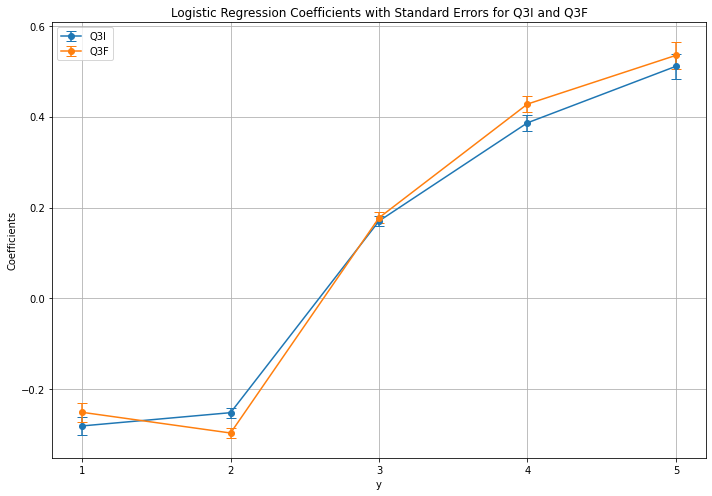

In [180]:
# Data for Q3I
categories = ['1', '2', '3', '4', '5']
Q3I_coef_values = [-0.2809, -0.2517, 0.1703, 0.3865, 0.5109]
Q3I_std_errors = [0.020, 0.011, 0.011, 0.017, 0.028]

# Data for Q3F
Q3F_coef_values = [-0.2509, -0.2965, 0.1774, 0.4278, 0.5350]
Q3F_std_errors = [0.021, 0.011, 0.012, 0.018, 0.029]

plt.figure(figsize=(10, 7), )
# Plotting Q3I
plt.errorbar(categories, Q3I_coef_values, yerr=Q3I_std_errors, label='Q3I', fmt='o-', capsize=5)

# Plotting Q3F
plt.errorbar(categories, Q3F_coef_values, yerr=Q3F_std_errors, label='Q3F', fmt='o-', capsize=5)

# Adding labels and title
plt.xlabel('y')
plt.ylabel('Coefficients')
plt.title('Logistic Regression Coefficients with Standard Errors for Q3I and Q3F')
plt.legend()

# Display plot
plt.grid(True)
plt.tight_layout()
plt.show()